In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['AAPL_Train.csv', 'AAPL_Test.csv']


In [2]:
data_train = pd.read_csv('../input/AAPL_Train.csv')
training_set = data_train.iloc[:,1:2]

In [3]:
mc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = mc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train , y_train = np.array(X_train),np.array(y_train)

In [5]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [6]:
#Adding LSTM Layers
regressor = Sequential()
regressor.add(LSTM(units= 50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))
#Adding Output layer
regressor.add(Dense(units=1))
#Compiling
regressor.compile(optimizer = 'adam',loss='mean_squared_error')

In [7]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0572
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0086
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0078
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0069
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015


In [8]:
data_test = pd.read_csv('../input/AAPL_Test.csv')
real_stock_price =  data_test.iloc[:,1:2]

In [9]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = mc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = mc.inverse_transform(predicted_stock_price)

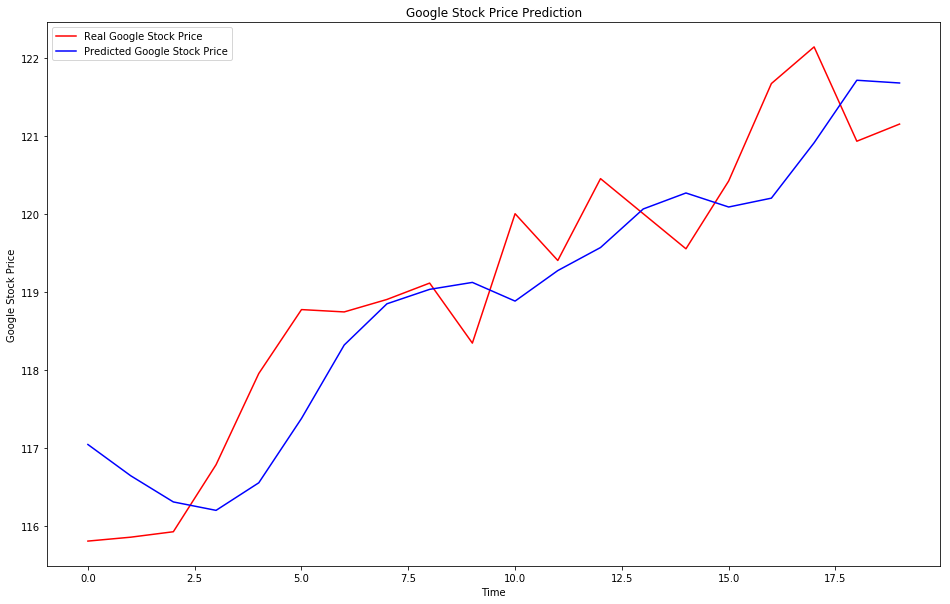

In [14]:
fig,ax=plt.subplots(figsize=(16,10))
plt.plot(real_stock_price[0:20], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()